# Simple Linear Regression Project
### 17.01.2023

<b>Modelling the linear relationship between Sales and Advertising dataset</b>

### Project Overview
<b>A Simple Linear Regression model is built to study the linear relationship between Sales and Advertising for a dietary weight control porduct</b>

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

### Reading the data

In [2]:
# read sales.txt from data folder and separate the columns using tab as separator

df = pd.read_csv('data/sales.txt', sep='\t', header=None)

### Exploratory Data Analysis

In [17]:
print(df.shape)
df.head()

(36, 2)


,Sales,Advertising
0,12.0,15
1,21.0,18
2,20.5,16
3,15.5,27
4,15.3,21


In [4]:
df.columns = ['Sales', 'Advertising']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        36 non-null     float64
 1   Advertising  36 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 704.0 bytes


In [5]:
# Declare feature variable and target variable

X = df['Sales'].values
y = df['Advertising'].values

# Sales and Advertising data values are given by X and y respectively.
# Values attribute of pandas datagrame returns the numpy arrays.

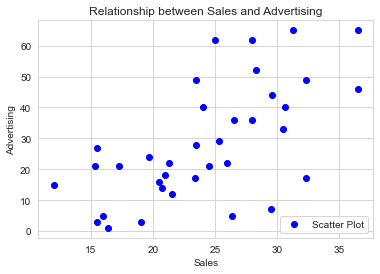

In [6]:
# Plot scatter plot between X and y

plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title("Relationship between Sales and Advertising")
plt.xlabel("Sales")
plt.ylabel("Advertising")
plt.legend(loc=4)
plt.show()

### Reshaping X and y

Since we are working with only one feature variable, so we need to reshape using the reshape(-1,1) function.

In [7]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [8]:
# print the dimensions of X and y after reshaping

print(X.shape)
print(y.shape)

(36, 1)
(36, 1)


### Difference in dimensions of X and y after reshaping

In [9]:
# Split X and y into training and test datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [10]:
# Print the dimensions of X_train, X_test, y_train, y_test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(24, 1)
(12, 1)
(24, 1)
(12, 1)


### Mechanics of the model

The dataset was split into two sets - the training and test set. Then, I instantiate the regressor lm and fit it on the training set with the fit method.

In [11]:
# Fit the linear regression model on training dataset

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predict the target variable on test dataset
y_pred = lm.predict(X_test)


### Model slope and intercept term

In [12]:
# Compute model slop and intercept

a = lm.coef_
b = lm.intercept_,
print("Estimated model slope, a: ", a)
print("Estimated model intercept, b: ", b)

Estimated model slope, a:  [[1.60509347]]
Estimated model intercept, b:  (array([-11.16003616]),)


In [ ]:
# Predicting advertising values for Sales values

lm.predict(X)[0:5]

# To make an individual prediction using the linear regression model

In [19]:
# save the model to pickle file
with open('SalesLinearRegression.pkl', 'wb') as f:
    pkl.dump(lm, f)

In [14]:
# To make an individual prediction using the linear regression model

print(str(lm.predict(np.array(24).reshape(1,-1))))

[[27.36220717]]


In [15]:
# Calculate and print Root Mean Square Error (RMSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error: ", rmse)

Root Mean Square Error:  11.227260890598616


### R2 Score

R2 Score is another metric to evaluate performance of a regression model. It is also called coefficient of determination. It gives us an idea of goodness of fit for the linear regression models. It indivates the percentage of variance that is explained by the model. 

It is a value between 0 and 1. A value of 1 indicates that the model explains all the variance in the response variable around its mean. A value of 0 indicates that the model explains none of the variance in the response variable around its mean.

In [16]:
# Calculate and print R2 Score

from sklearn.metrics import r2_score
print('R2 Score: ', r2_score(y_test, y_pred))

R2 Score:  0.5789222227665717
